# [2D] NaK model analysis

Here we will show you the neurodynamics analysis of a two-dimensional system model with the example of the $I_{\rm{Na,p+}}-I_K$ Model. 

The dynamical system is given by:
$$ C\dot{V} = I_{ext} - g_L * (V-E_L)-g_{Na}*m_\infty(V)(V-E_{Na})-g_K*n*(V-E_K)$$

$$ \dot{n} = \frac{n_\infty(V)-n}{\tau(V)} $$

where

$$ m_\infty(V) = 1 \ / \ ({1+\exp(\frac{V_{\rm{n_{half}}}-V}{k_m})}) $$

$$ n_\infty(V) = 1 \ / \ ({1+\exp(\frac{V_{\rm{n_{half}}}-V}{k_n})}) $$

This model specifies a leak current $I_L$, persistent sodium current $I_{\rm{Na, p}}$ 
with instantaneous activation kinetic, and a relatively slower persistent 
potassium current $I_K$ with either high or low threshold (the two choices 
result in fundamentally different dynamics). 

In [1]:
import brainpy as bp
import brainpy.math as bm

# bm.set_platform('cpu')
bm.set_dt(dt=0.02)
bm.enable_x64()

In [2]:
C = 1
E_L = -78  # different from high-threshold model
g_L = 8
g_Na = 20
g_K = 10
E_K = -90
E_Na = 60
Vm_half = -20
k_m = 15
Vn_half = -45  # different from high-threshold model
k_n = 5
tau = 1


@bp.odeint(method='exp_auto')
def int_V(V, t, n, Iext):
    m_inf = 1 / (1 + bm.exp((Vm_half - V) / k_m))
    I_leak = g_L * (V - E_L)
    I_Na = g_Na * m_inf * (V - E_Na)
    I_K = g_K * n * (V - E_K)
    dvdt = (-I_leak - I_Na - I_K + Iext) / C
    return dvdt


@bp.odeint(method='exp_auto')
def int_n(n, t, V):
    n_inf = 1 / (1 + bm.exp((Vn_half - V) / k_n))
    dndt = (n_inf - n) / tau
    return dndt

### Phase plane analysis

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 680 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 n=0.21052935861828526, V=-51.60868761111996 is a unstable focus.
I am plotting the trajectory ...


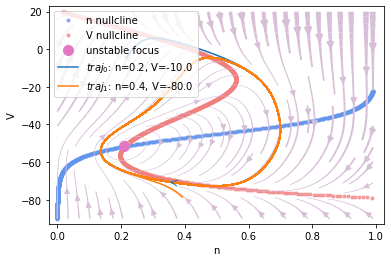

In [3]:
analyzer = bp.analysis.PhasePlane2D(
    model=[int_n, int_V],
    target_vars={'n': [0., 1.], 'V': [-90, 20]},
    pars_update={'Iext': 50.},
    resolutions={'n': 0.01, 'V': 0.1}
)
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory({'n': [0.2, 0.4], 'V': [-10, -80]},
                         duration=100., show=True)

### Codimension 1 bifurcation analysis

Here we show the codimension 1 bifurcation analysis of the $I_{\rm{Na,p+}}-I_K$ Model, in which $I_{ext}$ is varied in [0., 50.].

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 15000 candidates
I am trying to filter out duplicate fixed points ...
	Found 325 fixed points.
I am plotting the limit cycle ...


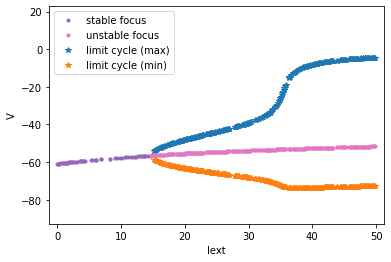

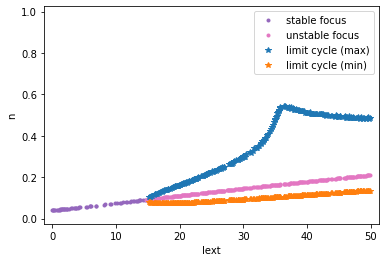

In [4]:
analyzer = bp.analysis.Bifurcation2D(
  model=[int_V, int_n],
  target_vars={"V": [-90., 20.], 'n': [0., 1.]},
  target_pars={'Iext': [0, 50.]},
  resolutions={'Iext': 0.1},
)
analyzer.plot_bifurcation(num_rank=30)
analyzer.plot_limit_cycle_by_sim(duration=100., show=True)

### Reference

1. Izhikevich, Eugene M. Dynamical systems in neuroscience (Chapter 4). MIT press, 2007.